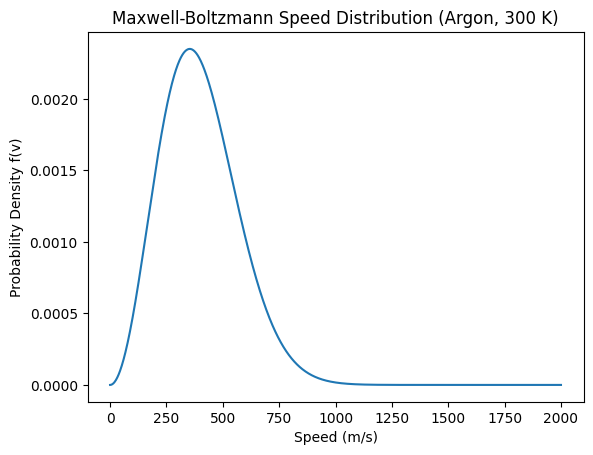

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 1.380649e-23  # Boltzmann constant (J/K)
m = 6.63e-26      # Mass of Argon atom (kg)
T = 300           # Temperature (K)

# Speed range (m/s)
v = np.linspace(0, 2000, 1000)

# Maxwell-Boltzmann speed distribution
f = 4 * np.pi * (m / (2 * np.pi * k * T))**(3/2) * v**2 * np.exp(-m * v**2 / (2 * k * T))

# Plot
plt.figure()
plt.plot(v, f)
plt.xlabel("Speed (m/s)")
plt.ylabel("Probability Density f(v)")
plt.title("Maxwell-Boltzmann Speed Distribution (Argon, 300 K)")
plt.show()


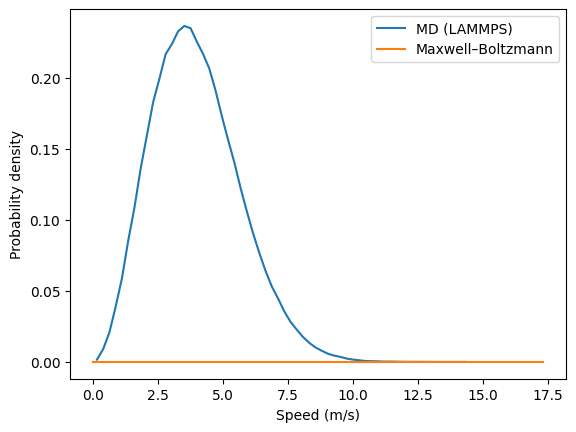

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- constants ----------
k = 1.380649e-23          # Boltzmann constant (J/K)
T = 300.0                 # temperature (K)
m = 39.948 * 1.66054e-27  # Argon mass (kg)

# ---------- read velocities ----------
vx, vy, vz = [], [], []

with open("vel.dump") as f:
    for line in f:
        if line.startswith("ITEM"):
            continue
        data = line.split()
        if len(data) == 5:
            vx.append(float(data[2]))
            vy.append(float(data[3]))
            vz.append(float(data[4]))

vx, vy, vz = np.array(vx), np.array(vy), np.array(vz)

# ---------- speed ----------
v = np.sqrt(vx**2 + vy**2 + vz**2)

# ---------- MD histogram ----------
hist, bins = np.histogram(v, bins=60, density=True)
v_mid = 0.5 * (bins[:-1] + bins[1:])

# ---------- Maxwell–Boltzmann ----------
v_th = np.linspace(0, v.max()*1.2, 1000)
f_MB = 4*np.pi*(m/(2*np.pi*k*T))**1.5 * v_th**2 * np.exp(-m*v_th**2/(2*k*T))

# ---------- plot ----------
plt.plot(v_mid, hist, label="MD (LAMMPS)")
plt.plot(v_th, f_MB, label="Maxwell–Boltzmann")
plt.xlabel("Speed (m/s)")
plt.ylabel("Probability density")
plt.legend()
plt.show()


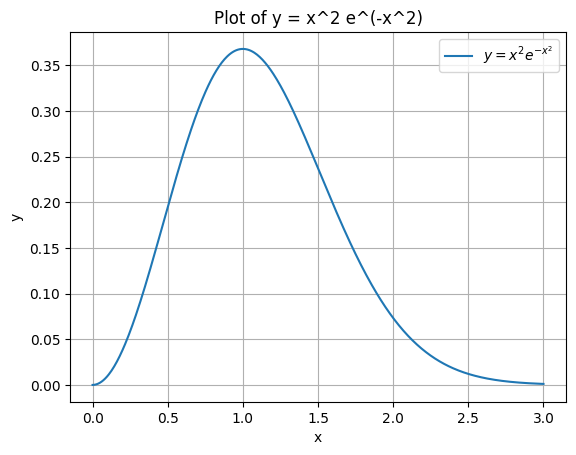

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(0, 3, 500)

# Compute y
y = x**2 * np.exp(-x**2)

# Plot
plt.plot(x, y, label=r'$y = x^2 e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2 e^(-x^2)')
plt.legend()
plt.grid(True)
plt.show()


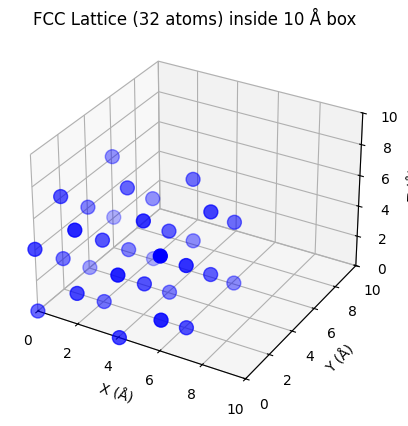

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lattice constant and box size
a = 4.05
nx, ny, nz = 2, 2, 2  # number of unit cells in x, y, z

# FCC basis (in fractional coordinates)
basis = np.array([[0,0,0],
                  [0.5,0.5,0],
                  [0.5,0,0.5],
                  [0,0.5,0.5]])

# Generate atom positions
positions = []
for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            for b in basis:
                pos = (np.array([i,j,k]) + b) * a
                positions.append(pos)

positions = np.array(positions)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(positions[:,0], positions[:,1], positions[:,2], color='blue', s=100)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X (Å)')
ax.set_ylabel('Y (Å)')
ax.set_zlabel('Z (Å)')
ax.set_title('FCC Lattice (32 atoms) inside 10 Å box')
plt.show()


0.2187155491421353


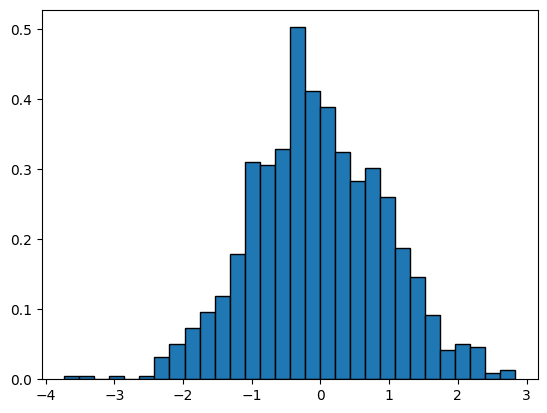

In [ ]:
import matplotlib.pyplot as plt

n, bins, _ = plt.hist(data, bins=30, density=True, edgecolor='black')

bin_width = bins[1] - bins[0]
print(bin_width)

plt.show()


NameError: name 'bins' is not defined

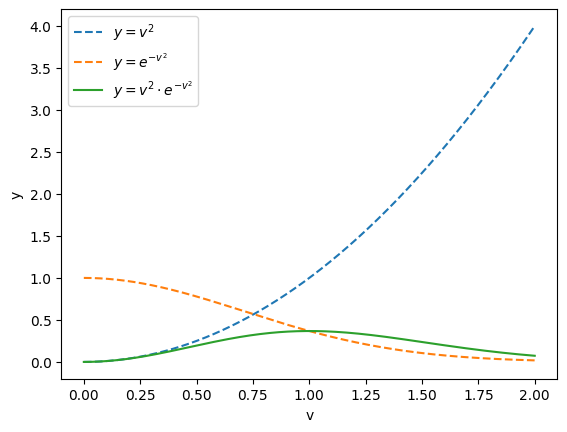

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

v = np.linspace(0, 2, 500)

y1 = v**2
y2 = np.exp(-v**2)
y3 = v**2 * np.exp(-v**2)

plt.plot(v, y1, linestyle="--", label=r"$y=v^2$")
plt.plot(v, y2, linestyle="--", label=r"$y=e^{-v^2}$")
plt.plot(v, y3, label=r"$y=v^2 \cdot e^{-v^2}$")

plt.xlabel("v")
plt.ylabel("y")
plt.legend()
plt.savefig("mb-comparison-graph.png", dpi=300, bbox_inches="tight")
plt.show()

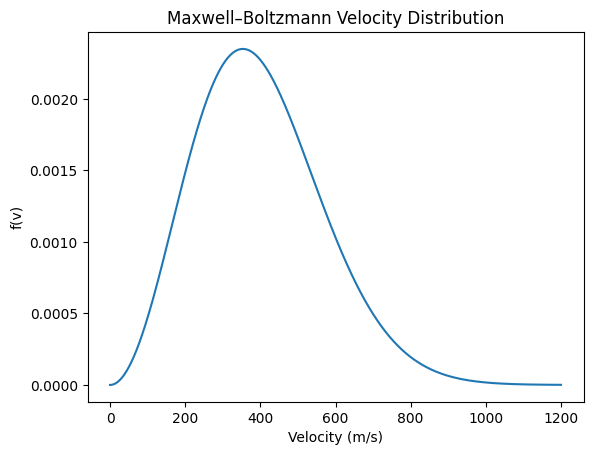

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# constants (SI units)
m = 6.63e-26
kB = 1.38e-23
T = 300

v = np.linspace(0, 1200, 1000)

f_v = 4*np.pi * (m/(2*np.pi*kB*T))**(3/2) * v**2 * np.exp(-m*v**2/(2*kB*T))

plt.plot(v, f_v)
plt.xlabel("Velocity (m/s)")
plt.ylabel("f(v)")
plt.title("Maxwell–Boltzmann Velocity Distribution")
plt.savefig("mb-graph.png", dpi=300, bbox_inches="tight")
plt.show()

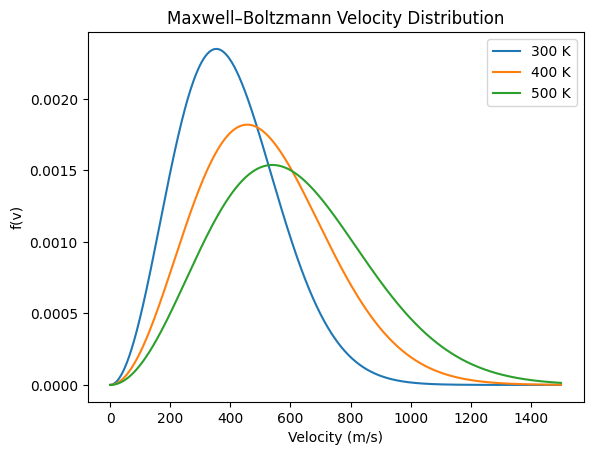

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 6.63e-26
kB = 1.38e-23

T1, T2, T3 = 300, 500, 700

v = np.linspace(0, 1500, 1000)

def mb_dist(v, T):
    return 4*np.pi * (m/(2*np.pi*kB*T))**(3/2) * v**2 * np.exp(-m*v**2/(2*kB*T))

f1 = mb_dist(v, T1)
f2 = mb_dist(v, T2)
f3 = mb_dist(v, T3)

plt.plot(v, f1, label="300 K")
plt.plot(v, f2, label="400 K")
plt.plot(v, f3, label="500 K")

plt.xlabel("Velocity (m/s)")
plt.ylabel("f(v)")
plt.title("Maxwell–Boltzmann Velocity Distribution")
plt.legend()
plt.savefig("mb-temp-change.png", dpi=300, bbox_inches="tight")
plt.show()


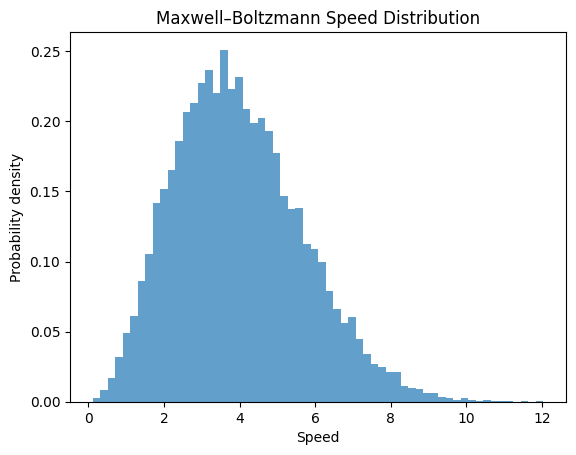

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# load vel.dump (skip LAMMPS header: first 9 lines)
data = np.loadtxt("vel.dump", skiprows=9)

vx = data[:,1]
vy = data[:,2]
vz = data[:,3]

# speed = |v|
v = np.sqrt(vx**2 + vy**2 + vz**2)

# histogram (normalized)
plt.hist(v, bins=60, density=True, alpha=0.7)

plt.xlabel("Speed")
plt.ylabel("Probability density")
plt.title("Maxwell–Boltzmann Speed Distribution")
plt.show()


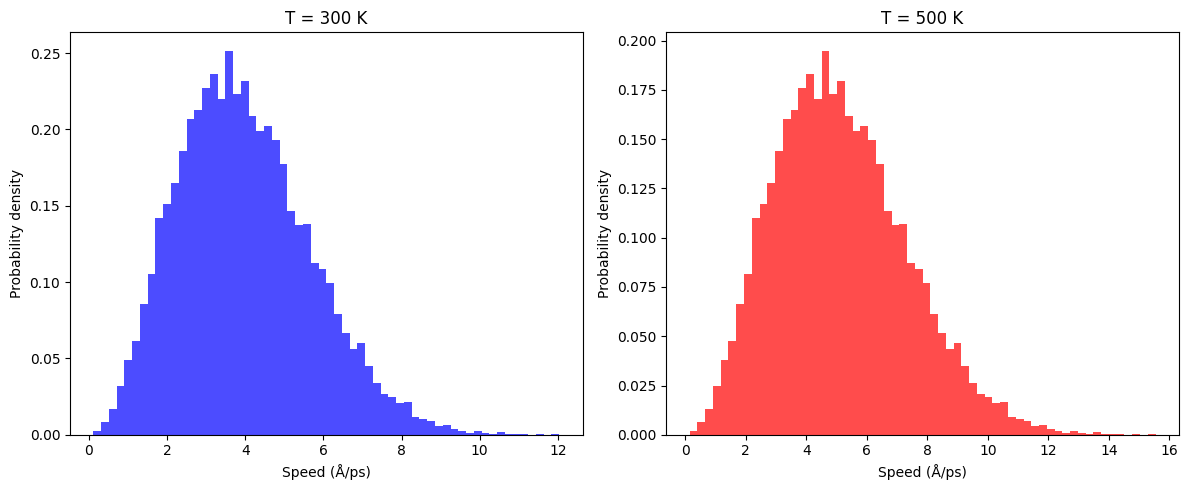

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def read_speeds(filename):
    data = np.loadtxt(filename, skiprows=9)  #LAMMPS header skipping
    vx, vy, vz = data[:,1], data[:,2], data[:,3]
    return np.sqrt(vx**2 + vy**2 + vz**2)

v_300 = read_speeds("vel-300k.dump")
v_500 = read_speeds("vel-500k.dump")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.hist(v_300, bins=60, density=True, alpha=0.7, color='blue')
ax1.set_title("T = 300 K")
ax1.set_xlabel("Speed (Å/ps)")
ax1.set_ylabel("Probability density")

ax2.hist(v_500, bins=60, density=True, alpha=0.7, color='red')
ax2.set_title("T = 500 K")
ax2.set_xlabel("Speed (Å/ps)")
ax2.set_ylabel("Probability density")

plt.tight_layout()
plt.savefig("lammps-initial-velocity-distribution.png", dpi=300, bbox_inches="tight")
plt.show()

IndexError: list index out of range

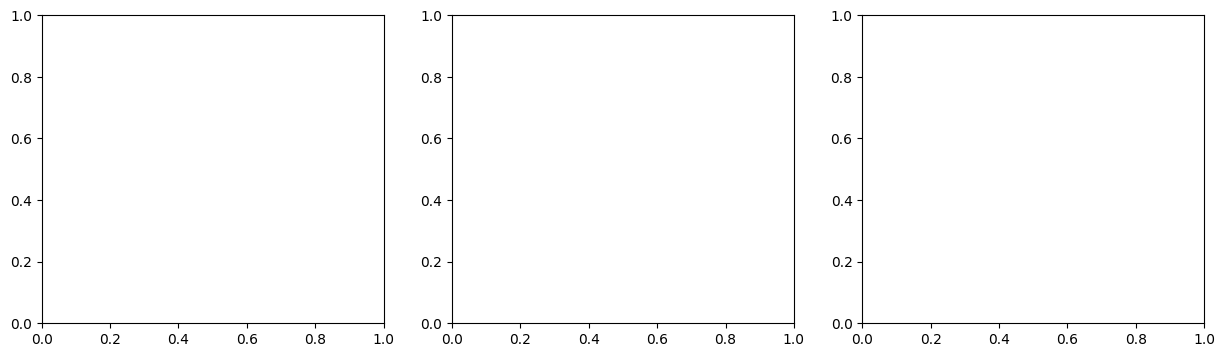

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- constants ----------
k = 1.380649e-23          # Boltzmann constant (J/K)
m = 39.948 * 1.66054e-27  # Argon mass (kg)

# ---------- function to read velocities per timestep ----------
def read_velocities(filename):
    velocities_per_step = []
    with open(filename) as f:
        while True:
            line = f.readline()
            if not line:
                break
            if line.startswith("ITEM: TIMESTEP"):
                f.readline()  # skip timestep number
                f.readline()  # skip NUMBER OF ATOMS
                f.readline()  # skip BOX BOUNDS line 1
                f.readline()  # skip BOX BOUNDS line 2
                f.readline()  # skip BOX BOUNDS line 3
                f.readline()  # skip header: id vx vy vz
                step_vel = []
                while True:
                    pos = f.tell()
                    l = f.readline()
                    if not l or l.startswith("ITEM:"):
                        f.seek(pos)
                        break
                    data = l.split()
                    if len(data) >= 5:
                        vx, vy, vz = float(data[2]), float(data[3]), float(data[4])
                        step_vel.append([vx, vy, vz])
                if step_vel:
                    velocities_per_step.append(np.array(step_vel))
    return velocities_per_step

# ---------- read dump ----------
all_steps = read_velocities("vel_ramp.dump")

# ---------- choose snapshots to plot ----------
# first, middle, last
snapshots_idx = [0, len(all_steps)//2, len(all_steps)-1]
temps = [300, 400, 500]  # approximate temperatures for labeling

# ---------- plot side-by-side ----------
fig, axes = plt.subplots(1, 3, figsize=(15,4))

for i, idx in enumerate(snapshots_idx):
    step_vel = all_steps[idx]
    v = np.sqrt(step_vel[:,0]**2 + step_vel[:,1]**2 + step_vel[:,2]**2)

    # histogram
    hist, bins = np.histogram(v, bins=60, density=True)
    v_mid = 0.5 * (bins[1:] + bins[:-1])

    # theoretical MB
    v_th = np.linspace(0, v.max()*1.2, 1000)
    f_MB = 4*np.pi*(m/(2*np.pi*k*temps[i]))**1.5 * v_th**2 * np.exp(-m*v_th**2/(2*k*temps[i]))

    # plot
    axes[i].plot(v_mid, hist, label="MD")
    axes[i].plot(v_th, f_MB, '--', label="MB theory")
    axes[i].set_title(f"T ~ {temps[i]} K")
    axes[i].set_xlabel("Speed (m/s)")
    axes[i].set_ylabel("Probability density")
    axes[i].legend()

plt.tight_layout()
plt.show()
